| **Chapter**                   | 2:  Simple compartmental models                       |
| ----------------------------- | ----------------------------------------------------- |
| **Computational Note**        | 2.x: Fitting a SIR model                              |
| **Package prerequisites**     | None                                                  |


# Fitting a SIR model to data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

0.5073147084857148
0.10034207821697592


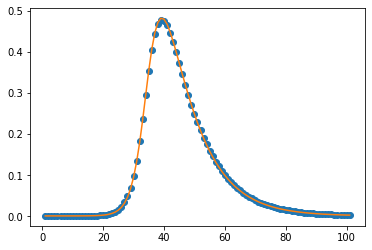

In [6]:
ydata = ['1e-06', '1.49920166169172e-06', '2.24595472686361e-06', '3.36377954575331e-06', '5.03793663882291e-06', '7.54533628058909e-06', '1.13006564683911e-05', '1.69249500601052e-05', '2.53483161761933e-05', '3.79636391699325e-05', '5.68567547875179e-05', '8.51509649182741e-05', '0.000127522555808945', '0.000189928392105942', '0.000283447055673738', '0.000423064043409294', '0.000631295993246634', '0.000941024110897193', '0.00140281896645859', '0.00209085569326554', '0.00311449589149717', '0.00463557784224762', '0.00689146863803467', '0.010227347567051', '0.0151380084180746', '0.0223233100045688', '0.0327384810150231', '0.0476330618585758', '0.0685260046667727', '0.0970432959143974', '0.134525888779423', '0.181363340075877', '0.236189247803334', '0.295374180276257', '0.353377036130714', '0.404138746080267', '0.442876028839178', '0.467273954573897', '0.477529937494976', '0.475582401936257', '0.464137179474659', '0.445930281787152', '0.423331710456602', '0.39821360956389', '0.371967226561944', '0.345577884704341', '0.319716449520481', '0.294819942458255', '0.271156813453547', '0.24887641905719', '0.228045466022105', '0.208674420183194', '0.190736203926912', '0.174179448652951', '0.158937806544529', '0.144936441326754', '0.132096533873646', '0.120338367115739', '0.10958340819268', '0.099755679236243', '0.0907826241267504', '0.0825956203546979', '0.0751302384111894', '0.0683263295744258', '0.0621279977639921', '0.0564834809370572', '0.0513449852139111', '0.0466684871328814', '0.042413516167789', '0.0385429293775096', '0.035022685071934', '0.0318216204865132', '0.0289112368382048', '0.0262654939162707', '0.0238606155312519', '0.021674906523588', '0.0196885815912485', '0.0178836058829335', '0.0162435470852779', '0.0147534385851646', '0.0133996531928511', '0.0121697868544064', '0.0110525517526551', '0.0100376781867076', '0.00911582462544914', '0.00827849534575178', '0.00751796508841916', '0.00682721019158058', '0.00619984569061827', '0.00563006790443123', '0.00511260205894446', '0.00464265452957236', '0.00421586931435123', '0.00382828837833139', '0.00347631553734708', '0.00315668357532714', '0.00286642431380459', '0.00260284137520731', '0.00236348540287827', '0.00214613152062159', '0.00194875883295343']
xdata = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101']

ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

def deriv(t, y, beta, gamma):
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    I = -(S + R)
    return S, I, R

def fit_odeint(x, beta, gamma):
    res = integrate.solve_ivp(fun=deriv, t_span=(0, 99), y0=(S0, I0, R0), args=(beta, gamma), max_step=1)
    return res.y[1]

N = 1.0
I0 = ydata[0]
S0 = N - I0
R0 = 0.0

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata, bounds = ((0, 0), (1, 1)))
fitted = fit_odeint(xdata, *popt)
print(popt[0])
print(popt[1])


plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.show()

In [7]:
res = integrate.solve_ivp(fun=deriv, t_span = (0, 100), y0=(S0, I0, R0), args=(popt[0], popt[1]), max_step=1)

<ipython-input-13-efec10a3cd96>:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='--')


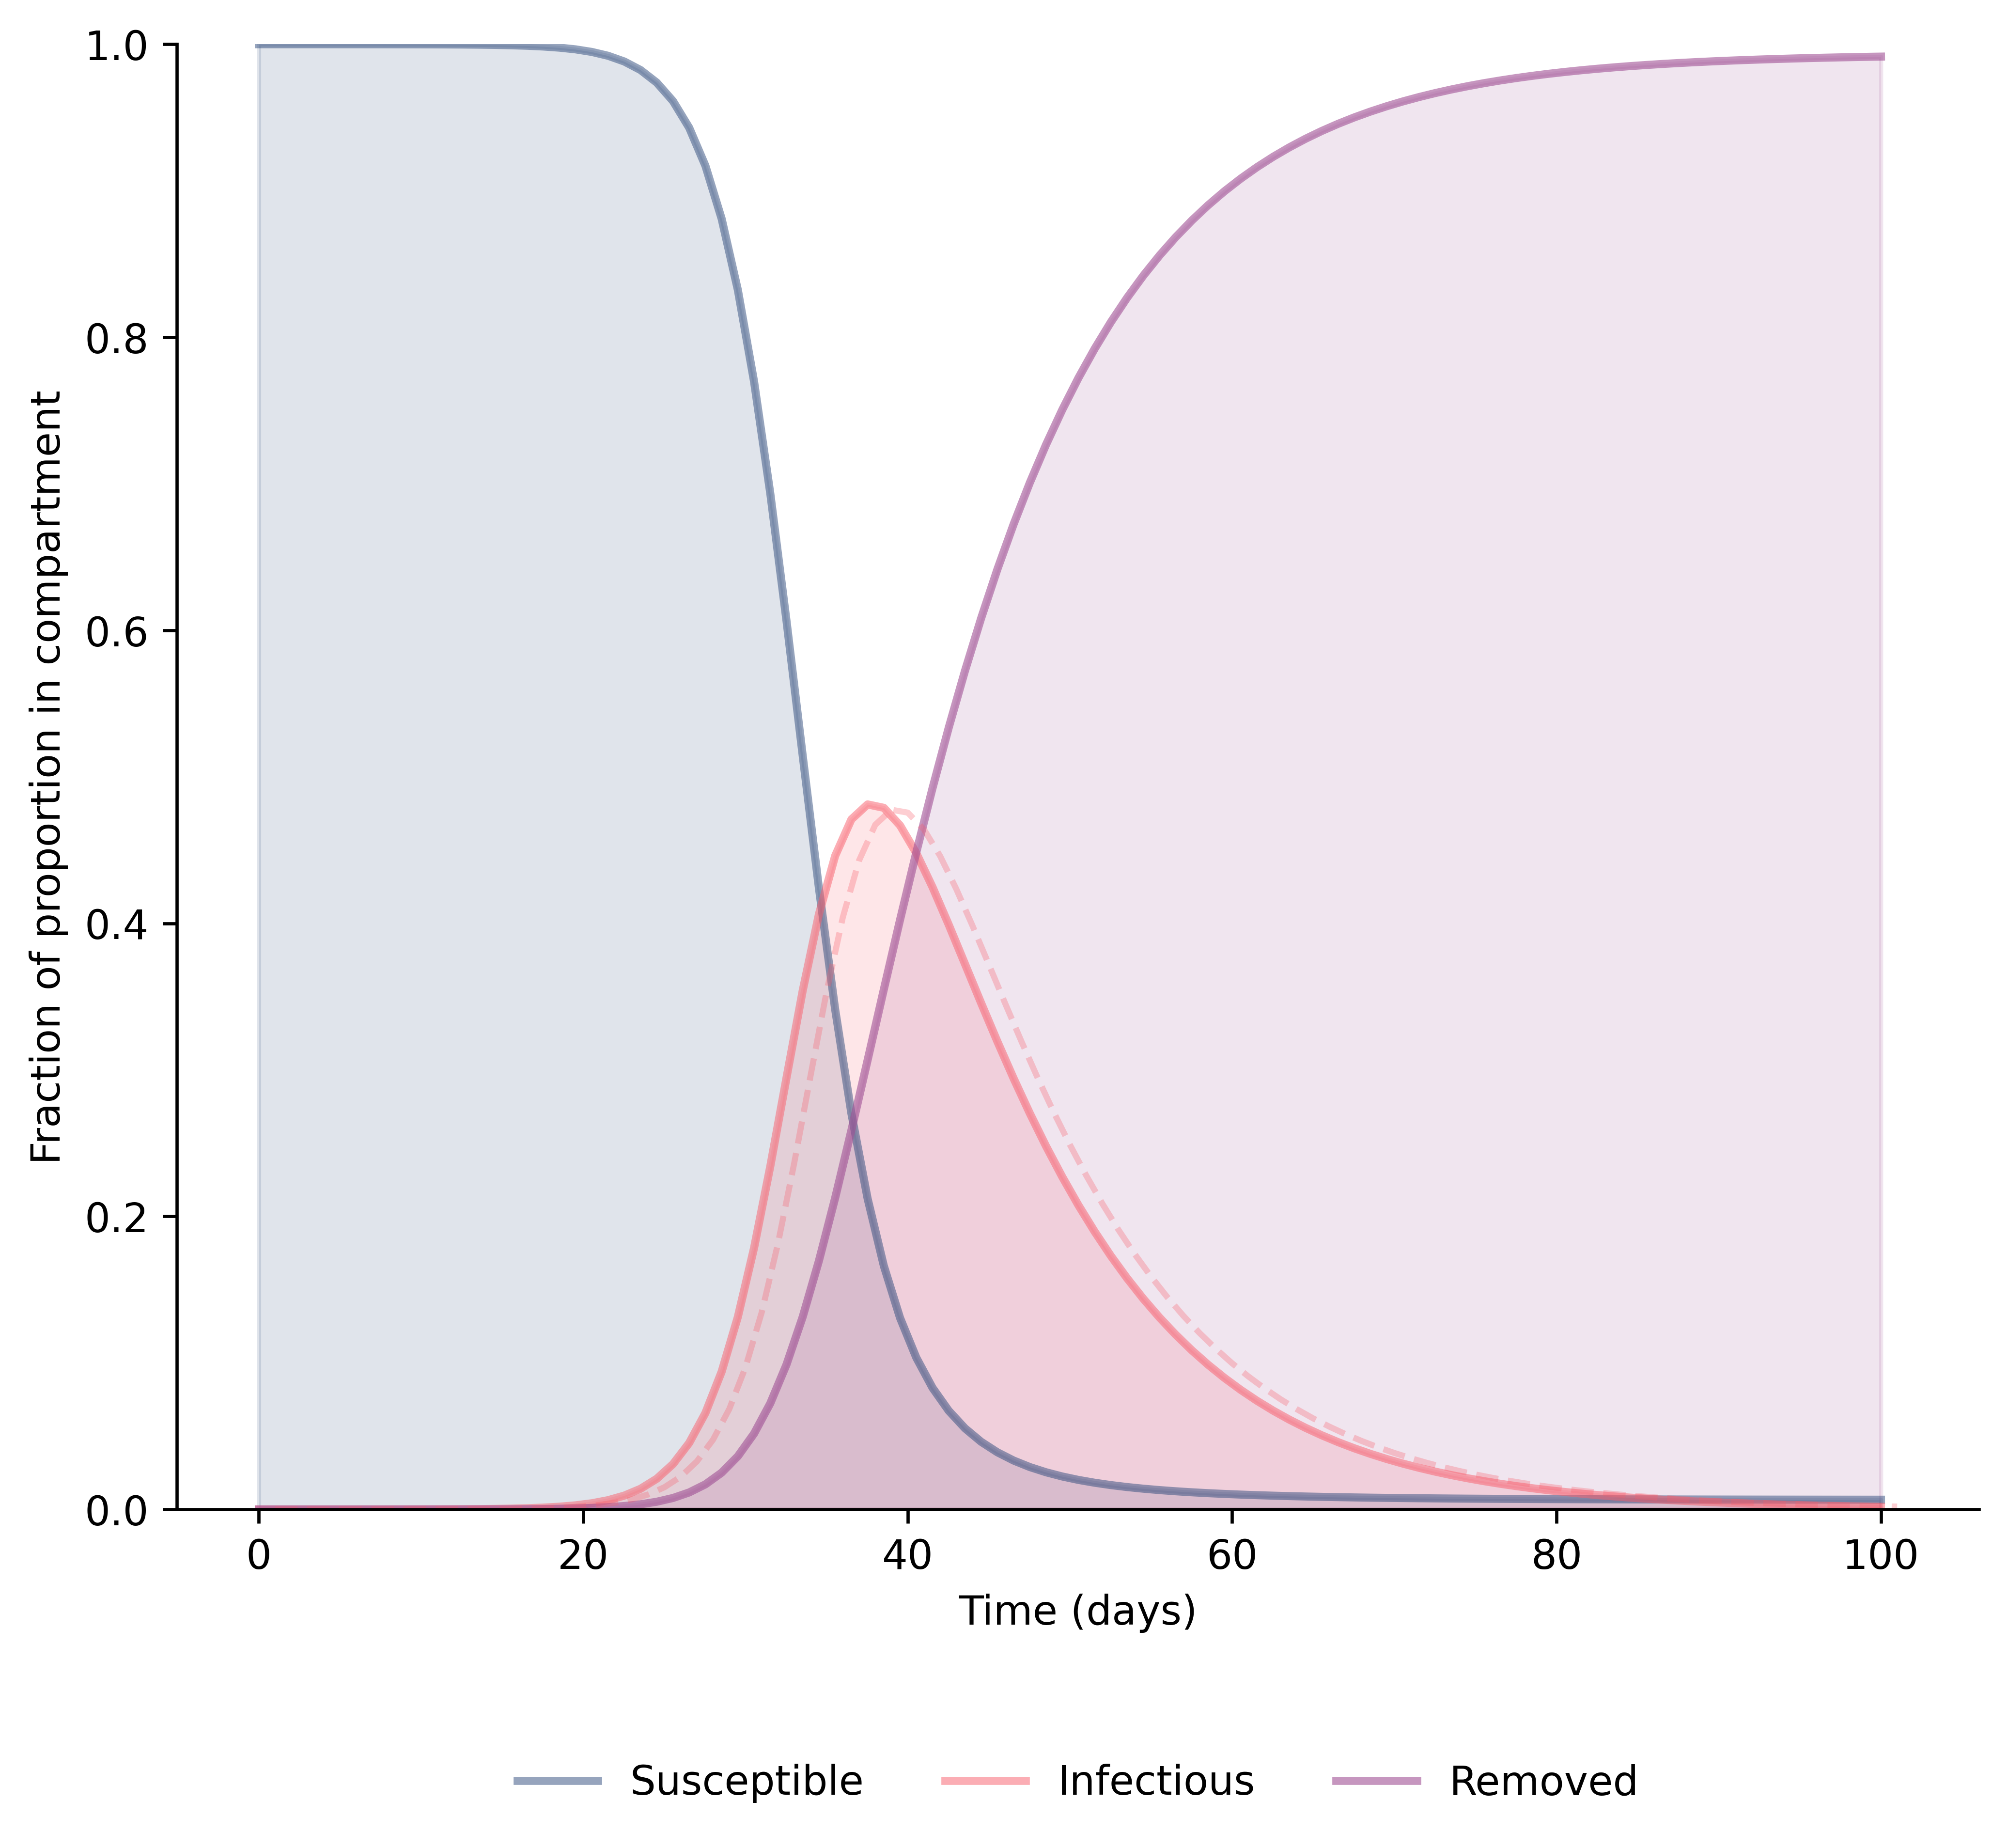

In [13]:
S, I, R = res.y


fig = plt.figure(facecolor="w", figsize=(8, 8), dpi=600)
ax = fig.add_subplot(111, axisbelow=True)

ax.plot(res.t, S, color=COLORS["S"], alpha=0.5, lw=2, label="Susceptible")
ax.plot(res.t, I, color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")
ax.plot(res.t, R, color=COLORS["R"], alpha=0.6, lw=2, label="Removed")
ax.plot(xdata, ydata, color=COLORS["I"], alpha=0.3, ls="--")

ax.fill_between(res.t, 0, S, color=COLORS["S"], alpha=0.15)
ax.fill_between(res.t, 0, I, color=COLORS["I"], alpha=0.15)
ax.fill_between(res.t, 0, R, color=COLORS["R"], alpha=0.15)

ax.set_xlabel('Time (days)')
ax.set_ylabel("Fraction of proportion in compartment")
ax.set_ylim(0, 1.0)
ax.grid(b=True, which='major', c='w', lw=2, ls='--')

for spine in ("top", "right"):
    ax.spines[spine].set_visible(False)

legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend(title='', bbox_to_anchor=(0.5, -0.225), loc="lower center", ncol=3, frameon=False)

fig.subplots_adjust(bottom=0.25)

plt.savefig("fitted_sir.pdf")
plt.show()